In [1]:
import matplotlib
import numpy as np
import pandas as pd
import calendar as cal
import matplotlib.pyplot as plt

In [47]:
#import data
fires = pd.read_csv('forestfires.csv', sep=",")   
#fires = pd.read_csv('fhttp://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv', sep=",") 

In [48]:
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [49]:
#Turn variable 'month' and 'day' from string to number
month_to_num_dict = {key.lower(): value for value, key in enumerate(cal.month_abbr)}
day_to_num_dict = {key.lower(): value for value, key in enumerate(cal.day_abbr)}


grouped = fires.groupby('month')
for group in grouped:
    fires.replace(group[0], month_to_num_dict[group[0]], inplace=True)
    

grouped = fires.groupby('day')
for group in grouped:
    fires.replace(group[0], day_to_num_dict[group[0]]+1, inplace=True)

In [50]:
fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


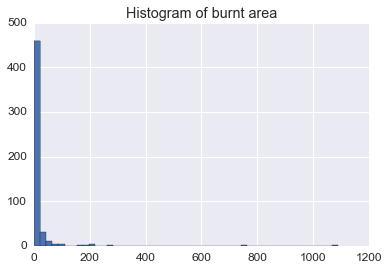

In [29]:
#Take a further look at 'area'
%matplotlib inline
fires['area'].hist(bins=50)
plt.title('Histogram of burnt area')
plt.show()

It's easy to find that 'area' is seriously right-skewed. To reduce skewness and improve symmetry, the logarithm function y = ln(x + 1).

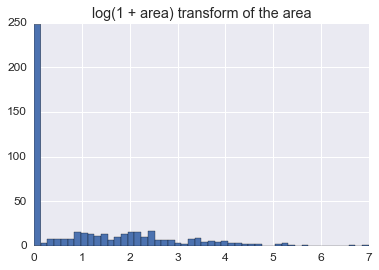

In [30]:
#Test transformed 'area'
%matplotlib inline
area_transform = np.log(1 + fires['area'])
area_transform.hist(bins=50)
plt.title('log(1 + area) transform of the area')
plt.show()


Since the variable 'day' seems to be irrelevant to the forest fires, we delete 'day'. In other words, the forest fires may have some connections to 'month' because it may involve in some seasonal factors but it almost has nonthing to do with whether it is Monday or Tuesday.

In [31]:
#Delete 'day' and transform 'area'
del fires['day']
fires['area'] = np.log(1 + fires['area'])
fires.head()

,X,Y,month,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


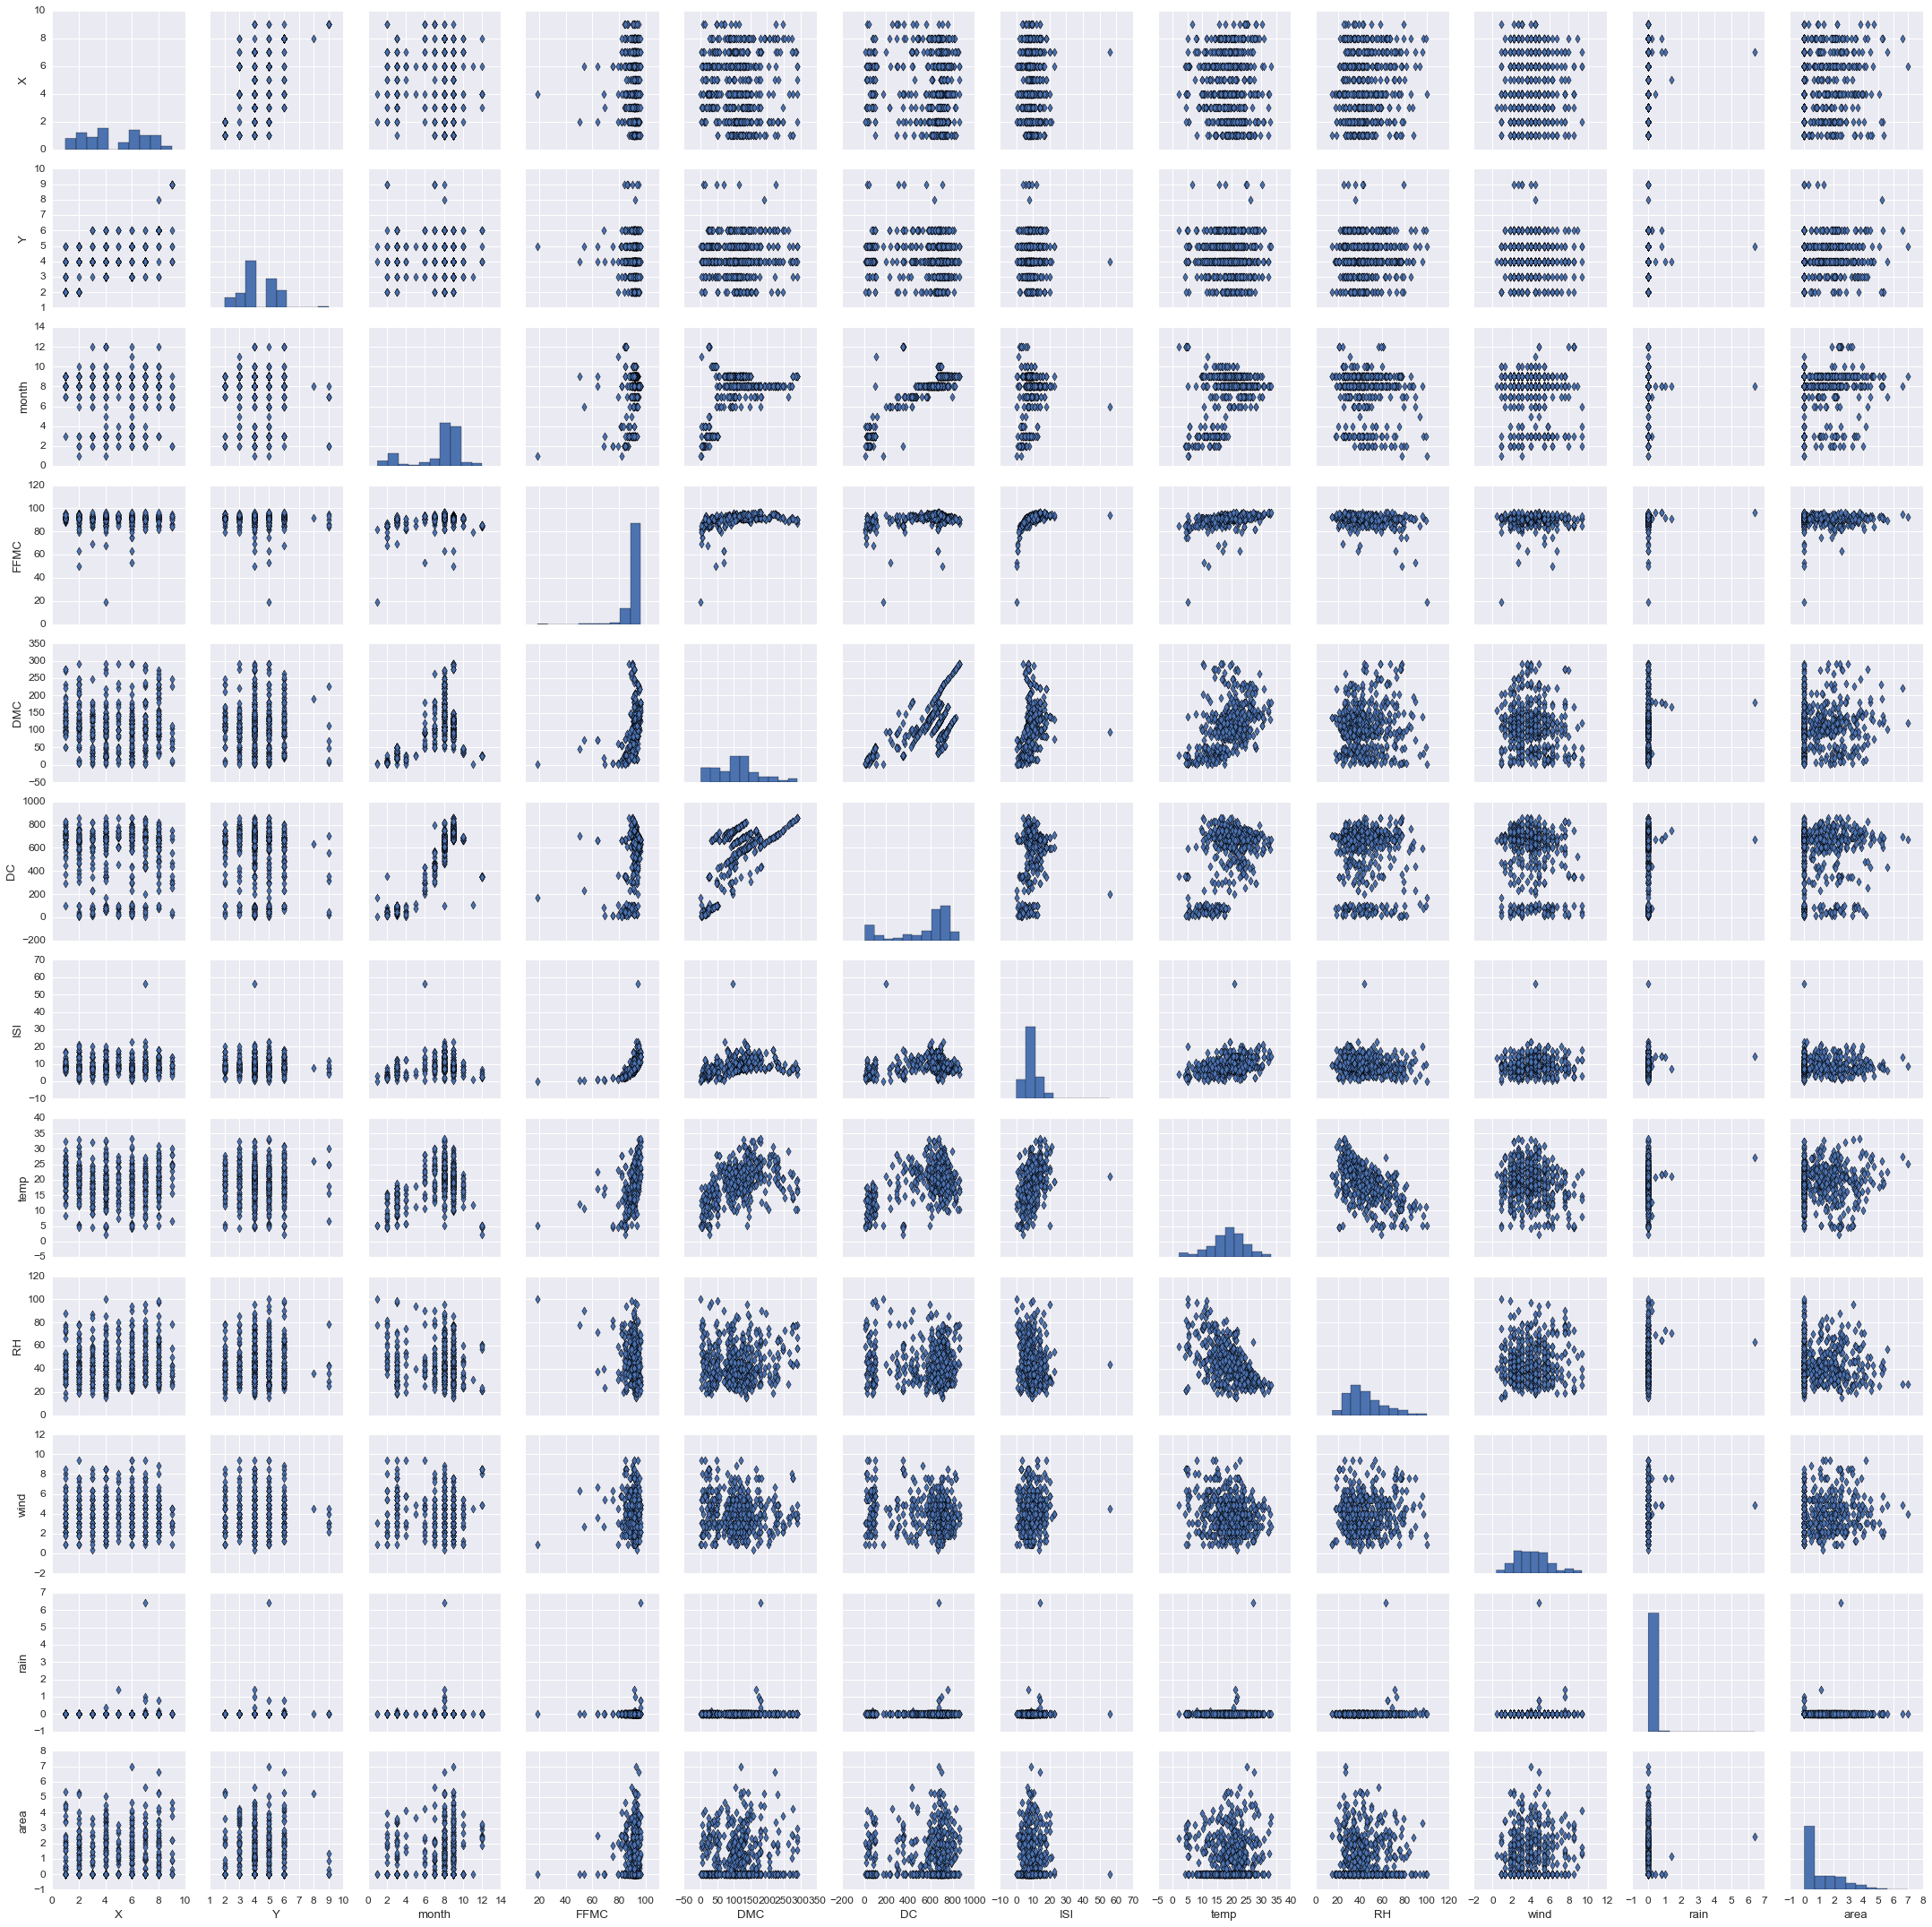

In [32]:
#Visualize data
%matplotlib inline

g=sns.pairplot(fires, markers='d', size=2.5, plot_kws=
    {"s":40,
    "alpha":1.0,
    'lw':0.5,
    'edgecolor':'k'})
plt.show()

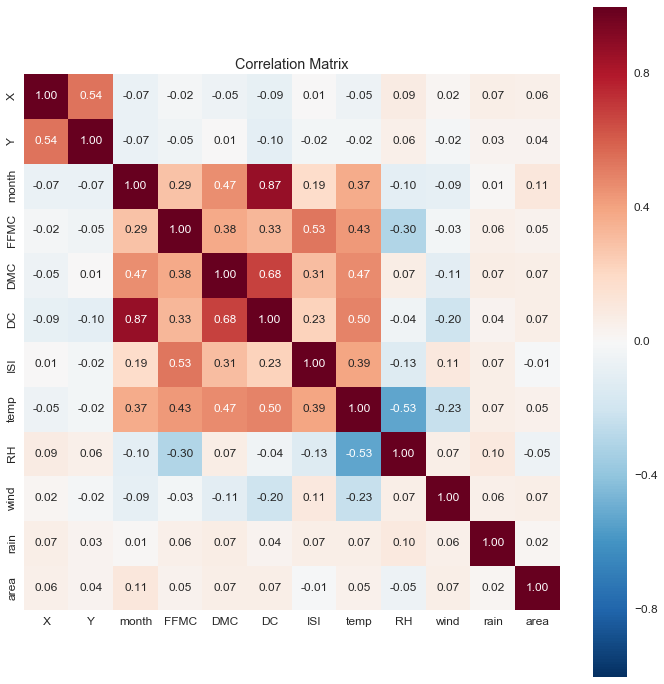

In [33]:
#See the correlation matrix
%matplotlib inline

f, axes = plt.subplots(1, 1, figsize=(12, 12), sharex=True)
cols=fires.columns
cormat = np.corrcoef(fires[cols].values.T)
sns.set(font_scale=1.2)
heatmap = sns.heatmap(cormat,
                       cbar=True,
                       annot=True,
                       square=True,
                       fmt='.2f',
                       annot_kws={'size': 12},
                       yticklabels=cols,
                       xticklabels=cols)
plt.title('Correlation Matrix')
plt.show()

In [34]:
#Standardize data
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

y = (fires['area'].values > 0)
X = fires.iloc[:,0:-1]

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)
    
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
pd.DataFrame(X_train_std).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,361.0,6.950427e-17,1.001388,-1.538023,-0.682512,-0.254757,1.028508,1.884019
1,361.0,3.063108e-16,1.001388,-1.835773,-0.225289,-0.225289,0.579953,3.800921
2,361.0,-1.550776e-16,1.001388,-2.802964,-0.193931,0.240908,0.675747,1.980263
3,361.0,-1.997786e-15,1.001388,-12.909411,-0.077594,0.155386,0.388366,0.979777
4,361.0,-1.407000e-16,1.001388,-1.705550,-0.843465,-0.041851,0.485323,2.773878
5,361.0,-1.734531e-16,1.001388,-2.133283,-0.443324,0.477782,0.684381,1.253029
6,361.0,8.672656e-17,1.001388,-1.903317,-0.536900,-0.137486,0.346015,9.889910
7,361.0,6.027804e-17,1.001388,-2.845060,-0.574035,0.091904,0.672467,2.431231
8,361.0,2.404971e-16,1.001388,-1.760748,-0.727006,-0.179730,0.549971,3.407965
9,361.0,-2.283492e-16,1.001388,-1.690435,-0.692303,0.028571,0.527637,3.022967


Method: Linear Regression
Train accuracy: 0.548
Test  accuracy: 0.551


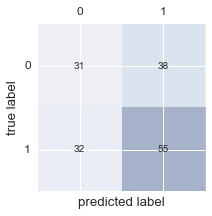

In [35]:
#Linear Regression
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.metrics import confusion_matrix

lir = LinearRegression()
lir.fit(X_train_std,y_train)
y_train_pred,y_test_pred= lir.predict(X_train_std),lir.predict(X_test_std)

#Turn the regression result into 0 and 1
y_train_pred[y_train_pred >= 0.5],y_test_pred[y_test_pred >= 0.5] = 1,1
y_train_pred[y_train_pred < 0.5],y_test_pred[y_test_pred < 0.5] = 0,0

print('Method: Linear Regression\nTrain accuracy: %.3f\nTest  accuracy: %.3f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)))

#Test Confusion Matrix
confmat = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    
plt.xlabel('predicted label')
plt.ylabel('true label')
#plt.title('Test Confusion Matrix')
plt.show()

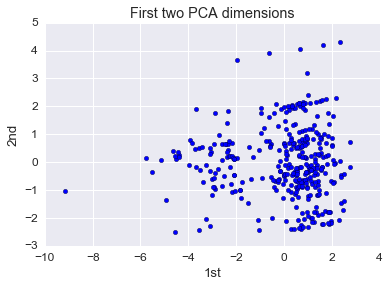

[ 0.29883236  0.14148877]


In [38]:
#PCA analysis
%matplotlib inline
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.title('First two PCA dimensions')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.show()
print(pca.explained_variance_ratio_)

Method: clf 
Train accuracy: 0.543
Test  accuracy: 0.519


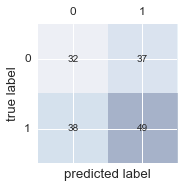

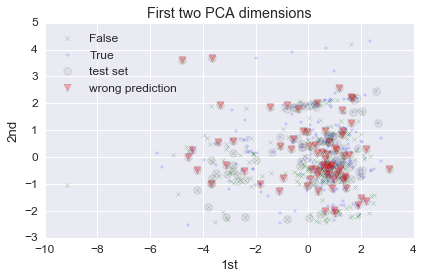

Method: svm.linear 
Train accuracy: 0.537
Test  accuracy: 0.487


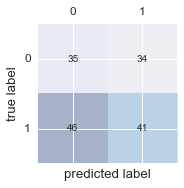

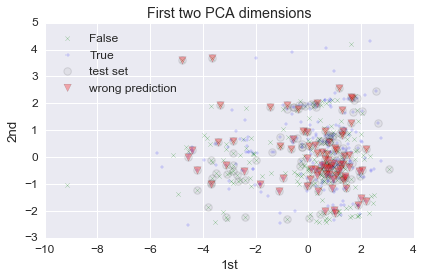

Method: svm.poly 
Train accuracy: 0.546
Test  accuracy: 0.564


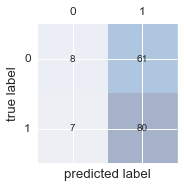

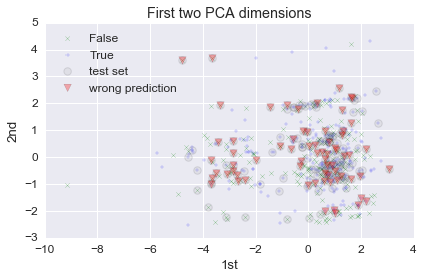

Method: svm.rbf 
Train accuracy: 0.562
Test  accuracy: 0.564


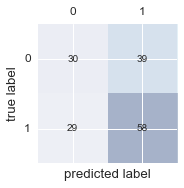

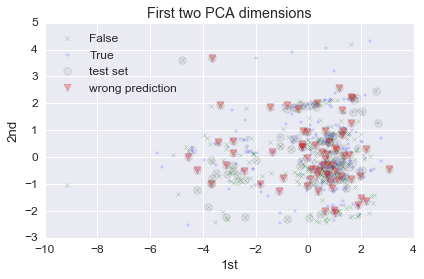

Method: svm.sigmoid 
Train accuracy: 0.496
Test  accuracy: 0.551


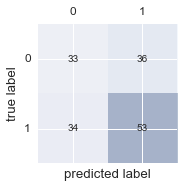

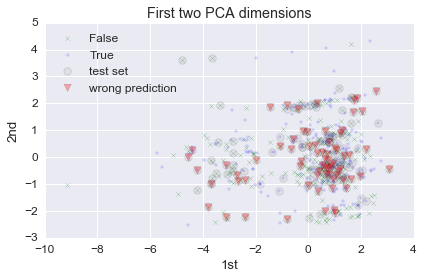

In [39]:
#Try other methods
%matplotlib inline
from sklearn.pipeline import Pipeline
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



method = [
              ('clf', LogisticRegression(random_state=1)),\
              ('svm.linear', svm.SVC(kernel='linear', gamma=0.2)),\
              ('svm.poly',svm.SVC(kernel='poly', gamma=0.2)),\
              ('svm.rbf',svm.SVC(kernel='rbf',gamma=0.2)),\
              ('svm.sigmoid',svm.SVC(kernel='sigmoid',gamma=0.2)),\
            
              ]
X_std = stdsc.transform(X)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
X_pca = pca.transform(X_std)


for i in range(len(method)):
    pipe_cl = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    method[i]])

    pipe_cl.fit(X_train, y_train)
    print('Method: %s ' % method[i][0])
    #print('Test Accuracy: %.3f' % pipe_cl.score(X_test, y_test))
    print('Train accuracy: %.3f\nTest  accuracy: %.3f' % (pipe_cl.score(X_train, y_train),pipe_cl.score(X_test, y_test)))
    y_pred = pipe_cl.predict(X_test)
    
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    wrong_y = (y_test!=y_pred)
    
    fig = plt.figure()      
    markers = ('x',  '+')
    colors = ('green',  'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
      
    for idx, cl in enumerate(np.unique(y)):
        
        plt.scatter(x=X_pca[y == cl, 0], y=X_pca[y == cl, 1],
                alpha=0.5, c=cmap(idx),
                marker=markers[idx], label=cl)
    
    plt.scatter(X_test_pca[:, 0],
            X_test_pca[:, 1],
            c='grey',
            alpha=0.1,
            linewidths=1,
            marker='o',
            s=55, label='test set')
    
    plt.scatter(x=X_test_pca[wrong_y==True,0],\
                y=X_test_pca[wrong_y==True,1],\
                c='red',
                alpha=0.3,
                marker='v',
                s=55, label='wrong prediction')
    

    plt.title('First two PCA dimensions')
    plt.xlabel('1st')
    plt.ylabel('2nd')
    plt.legend(loc='upper left')
    
    plt.tight_layout()
    plt.show()





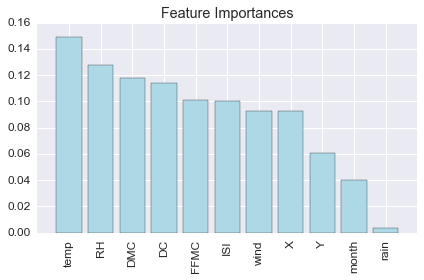

[ 0.14935722  0.1280545   0.11759765  0.11432912  0.10071045  0.10008146
  0.09281338  0.09269931  0.06072502  0.04009978  0.00353211]


In [40]:
#Find feature importance
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10000,
                                random_state=0)
forest.fit(X_train_std, y_train)
importances = forest.feature_importances_
feat_labels = fires.columns[0:-1]
indices = np.argsort(importances)[::-1]

# plot of feature importances
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        color='lightblue',
        align='center')
plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

print(importances[indices])

In [41]:
#Choose only two most important features
x=X.loc[:,['temp','RH']]
y=(fires['area'].values > 0)



x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_train)
x_test_std = stdsc.transform(x_test)


In [44]:
#Simplize some notations
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

decision = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=5,
                              random_state=0)


random = RandomForestClassifier(criterion='entropy',
                                n_estimators=10, 
                                random_state=0)

knn = KNeighborsClassifier(n_neighbors=5)

extra =  ExtraTreesClassifier(criterion='entropy', 
                              max_depth=5,
                              random_state=0)

adaboost = AdaBoostClassifier(base_estimator=decision,
                         n_estimators=10, 
                         learning_rate=0.5,
                         random_state=0)

gradient = GradientBoostingClassifier(max_depth=5,
                              random_state=0)

bagging = BaggingClassifier(base_estimator=decision,
                        n_estimators=10, 
                        max_samples=10, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1)


bayes = GaussianNB()


vote = VotingClassifier(estimators=[('decision', decision), ('extra', extra), ('gradient', gradient)], voting='soft', weights=[1,1,1])


In [45]:
#Define plot function
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def pl(X,y,cl):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y_test))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.05),
                           np.arange(x2_min, x2_max, 0.05))
    
    Z = cl.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(X[y == l, 0], X[y == l, 1], alpha=0.68,
                    c=c, label=l, marker=m)

    plt.scatter(x=X[wrong_y==True,0],y=X[wrong_y==True,1],
                c='black',
                alpha=1,
                marker='v',
                s=66, label='wrong prediction')

    plt.xlabel('temp')
    plt.ylabel('RH')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()



Method: Decision Tree 
Train accuracy: 0.607
Test  accuracy: 0.635


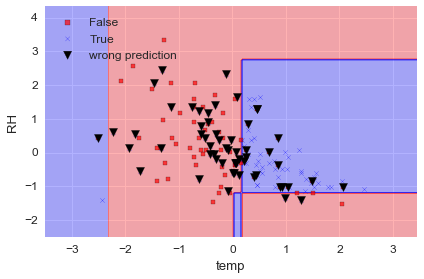

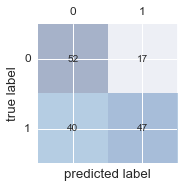

Method: Random Forest 
Train accuracy: 0.947
Test  accuracy: 0.558


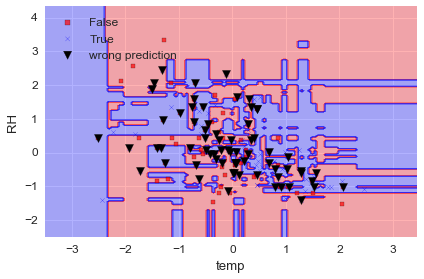

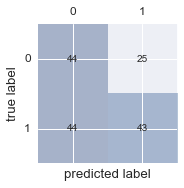

Method: KNN 
Train accuracy: 0.665
Test  accuracy: 0.506


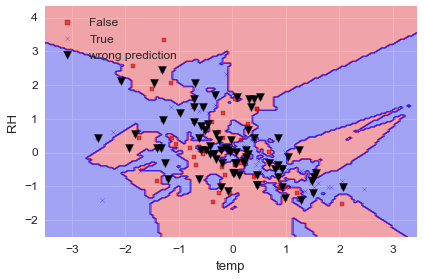

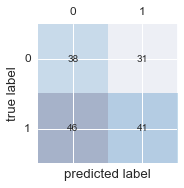

Method: Extra Trees 
Train accuracy: 0.704
Test  accuracy: 0.564


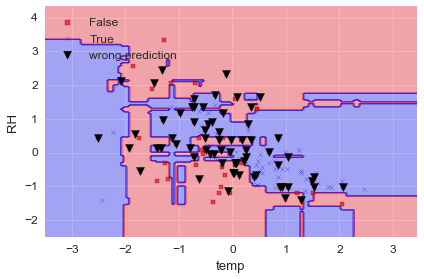

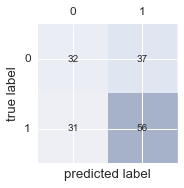

Method: AdaBoost 
Train accuracy: 0.889
Test  accuracy: 0.500


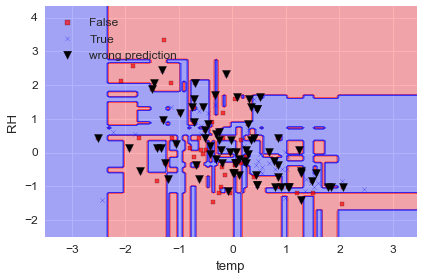

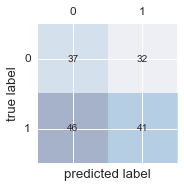

Method: Gradient Boosting 
Train accuracy: 0.958
Test  accuracy: 0.538


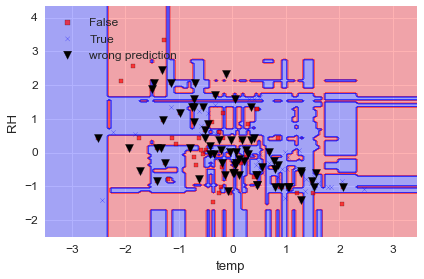

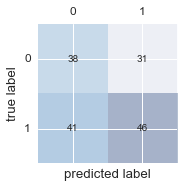

Method: Bagging 
Train accuracy: 0.571
Test  accuracy: 0.442


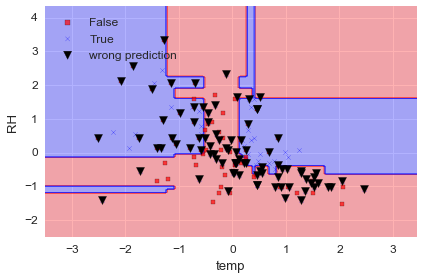

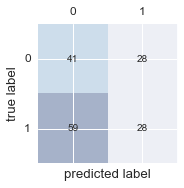

Method: Navie Bayes 
Train accuracy: 0.565
Test  accuracy: 0.494


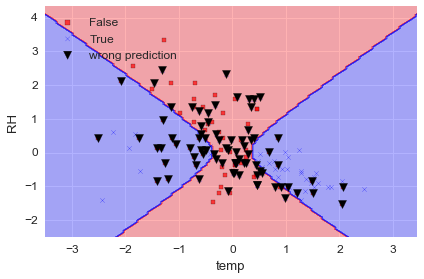

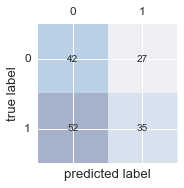

Method: Voting 
Train accuracy: 0.934
Test  accuracy: 0.545


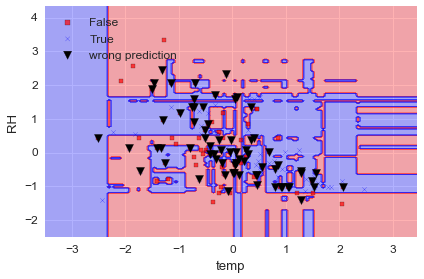

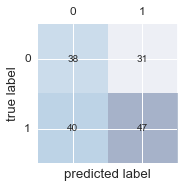

In [46]:
#Try some Classifier methods
%matplotlib inline
for clf, md in zip([decision, random, knn, extra, adaboost, gradient, bagging, bayes, vote],\
                   ['Decision Tree','Random Forest', 'KNN','Extra Trees','AdaBoost','Gradient Boosting','Bagging','Navie Bayes','Voting']):
   
        clf.fit(x_train_std, y_train)
    
        y_train_pred = clf.predict(x_train_std)
        y_test_pred = clf.predict(x_test_std)
    
        print('Method: %s ' % md)
        print('Train accuracy: %.3f\nTest  accuracy: %.3f' % (accuracy_score(y_train, y_train_pred),accuracy_score(y_test, y_test_pred)))

        y_pred=clf.predict(x_test_std)
        wrong_y = (y_test!=y_pred)

        pl(x_test_std,y_test,clf)
        
        confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
        fig, ax = plt.subplots(figsize=(2.5, 2.5))
        ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
        for i in range(confmat.shape[0]):
            for j in range(confmat.shape[1]):
                ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
     
        plt.xlabel('predicted label')
        plt.ylabel('true label')
        plt.show()
